In [5]:
import pandas
import matplotlib.pyplot as plt
df = pandas.read_csv('../data/predictive_maintenance.csv')


/tmp/ipykernel_4889/2585860444.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


Verificando nulos e info

In [6]:
df.isnull().sum() #Não há nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Análise Univariada

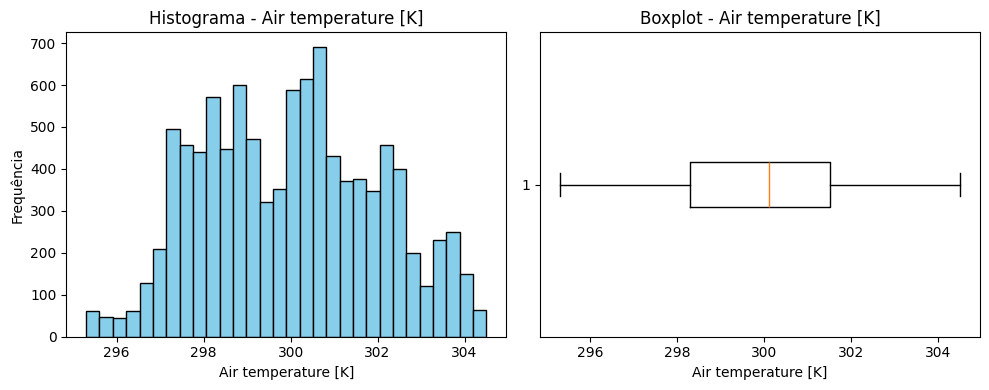

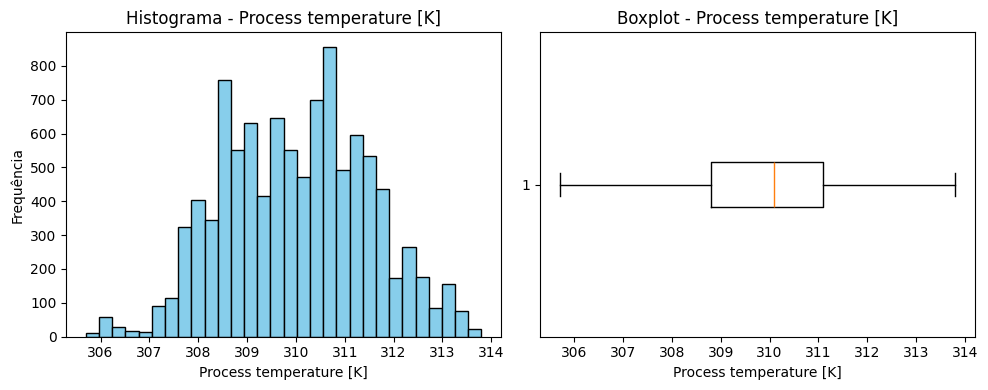

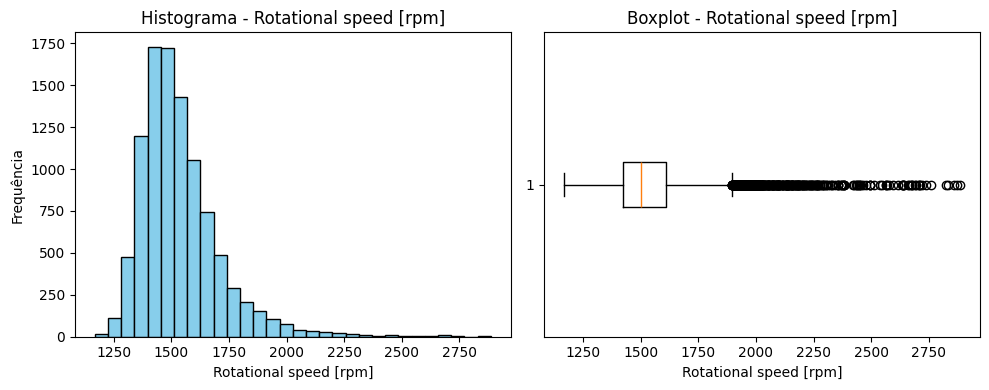

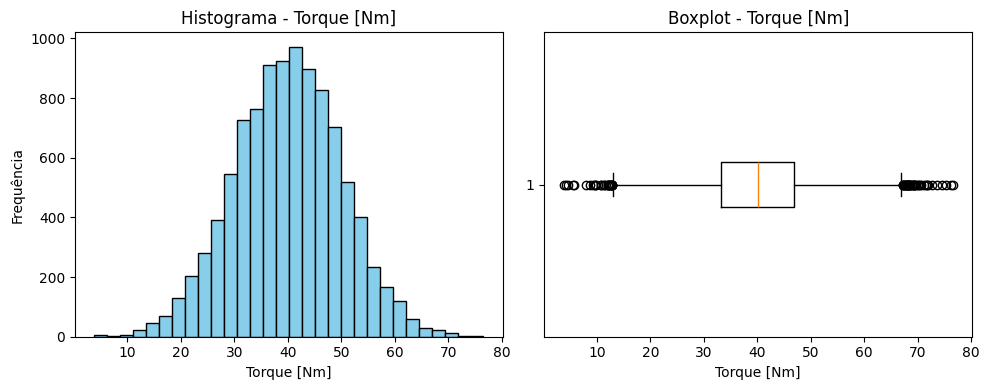

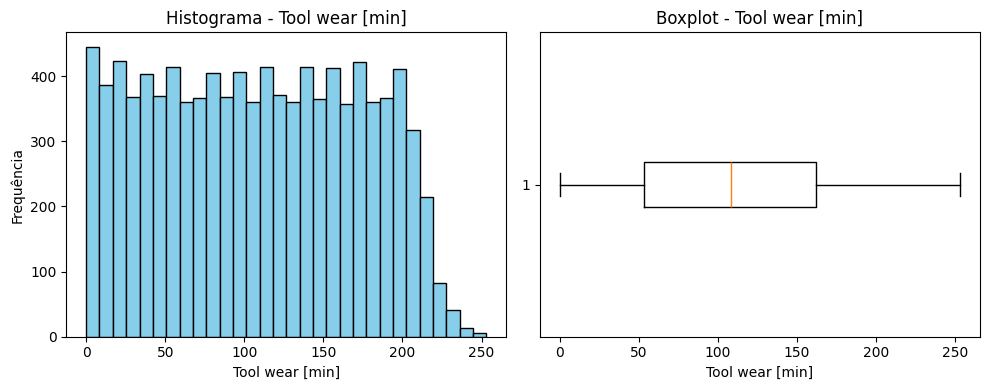

In [23]:
numericas = [x for x in df.columns.to_list() if x not in ['UDI', 'Product ID', 'Type', 'Target', 'Failure Type']]
numericas

for col in numericas:
    plt.figure(figsize=(10, 4))

    # Histograma
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


Variáveis categóricas

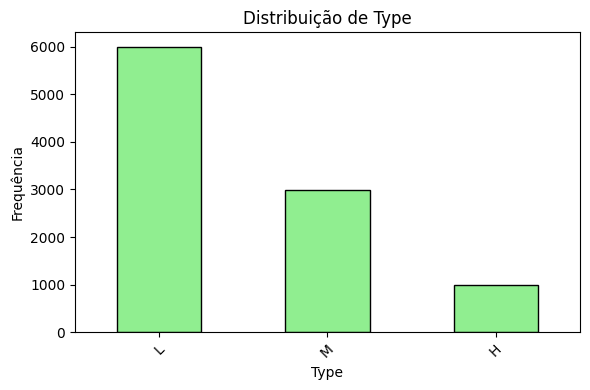

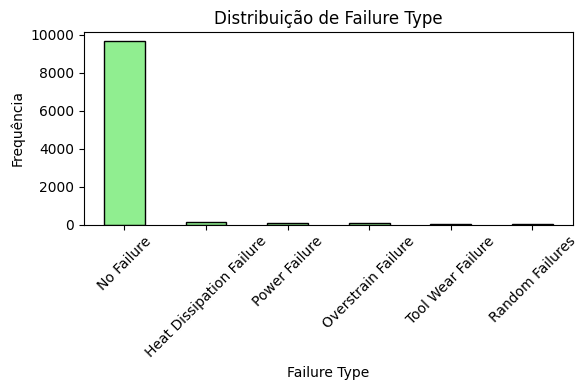

In [24]:
cat = ['Type', 'Failure Type']

for col in cat:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Distribuição de {col}')
    plt.ylabel('Frequência')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


 Variável binária (Target)

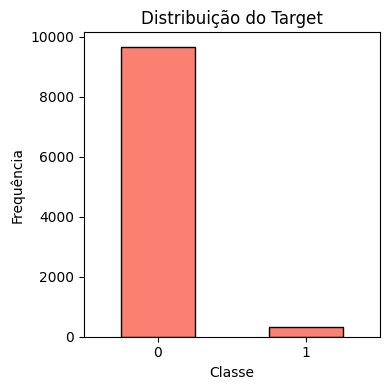

In [25]:
plt.figure(figsize=(4, 4))
df['Target'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribuição do Target')
plt.ylabel('Frequência')
plt.xlabel('Classe')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
